# Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 300)
np.random.seed(42)

In [37]:
train_df = pd.read_csv("./data/train.csv")
train_df

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


In [38]:
test_df = pd.read_csv("./data/test.csv")
test_df

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,6,2019-09-29 00:00:00+08:00,127348,53,Never open,4,8,0,0,0,0,0,0,0,0,0,55965
55966,6,2019-09-29 00:00:00+08:00,127396,53,59,802,1207,0,0,1,0,0,0,0,0,0,55966
55967,6,2019-09-29 00:00:00+08:00,127574,43,Never open,7,Never checkout,0,0,0,0,0,0,0,0,0,55967
55968,6,2019-09-29 00:00:00+08:00,127887,43,5,5,6,2,5,14,0,0,0,0,0,0,55968


In [39]:
users_df = pd.read_csv("./data/users.csv")
users_df

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
...,...,...,...,...,...,...
127881,127921,NaN,1.0,0.0,NaN,@yahoo.com
127882,127922,1.0,1.0,0.0,20.0,@gmail.com
127883,127923,NaN,1.0,0.0,NaN,@gmail.com
127884,127924,NaN,0.0,0.0,NaN,@gmail.com


# Preprocessing (Users)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
users_df_clean = users_df.copy()

# Set index
users_df_clean = users_df_clean.set_index("user_id")

# Filling missing values
users_df_clean["attr_1"] = users_df_clean["attr_1"].fillna(1.0)
users_df_clean["attr_2"] = users_df_clean["attr_2"].fillna(1.0)

# Masking age
users_df_clean["age"] = users_df_clean["age"].mask((users_df_clean["age"] > 70) | (users_df_clean["age"] < 15))

# Converting domains to integers
domains = ['@gmail.com', 'other', '@yahoo.com', '@hotmail.com', '@ymail.com', '@live.com', '@icloud.com', '@outlook.com', '@rocketmail.com', '@qq.com', '@163.com']
domains_dict = {key: domains.index(key) for key in domains}
users_df_clean["domain"] = users_df_clean["domain"].map(lambda x: domains_dict[x])

# Predicting missing ages using KNN Regressor
users_train_df = users_df_clean[users_df_clean["age"].notna()].astype(int)
users_test_df = users_df_clean[users_df_clean["age"].isna()].drop("age", axis = 1).astype(int)

knn = KNeighborsRegressor(n_neighbors = 11)
knn.fit(users_train_df.drop("age", axis = 1).to_numpy(), users_train_df["age"].to_numpy())

users_df_clean = users_train_df.copy()
for key, group in users_test_df.groupby(["attr_1", "attr_2", "attr_3", "domain"]):
    group = group.copy()
    most_likely_age = knn.predict([np.array(key)])
    std_dev = 5
    group.loc[:, "age"] = np.rint(np.random.normal(most_likely_age, std_dev, len(group)))
    users_df_clean = pd.concat([users_df_clean, group])
    
# Binning ages
users_df_clean["age_grp"] = users_df_clean["age"] // 5

users_df_clean = users_df_clean.astype(int)
users_df_clean = users_df_clean.sort_index()
users_df_clean

,attr_1,attr_2,attr_3,age,domain,age_grp
user_id,,,,,,
0,1,1,0,38,0,7
1,1,1,2,50,0,10
2,1,1,0,31,1,6
3,1,1,0,35,0,7
4,1,1,2,33,0,6
...,...,...,...,...,...,...
127921,1,1,0,44,2,8
127922,1,1,0,20,0,4
127923,1,1,0,37,0,7


# Preprocessing (Train)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    train_df.drop("open_flag", axis = 1),
    train_df_all["open_flag"],
    test_size = 0.2,
    random_state = 42
)

In [45]:
def clean_data(df):
    tdf = df.copy()
    
    # Rename columns
    tdf = tdf.rename(columns = {
        "open_count_last_10_days": "open_10",
        "open_count_last_30_days": "open_30",
        "open_count_last_60_days": "open_60",
        "login_count_last_10_days": "login_10",
        "login_count_last_30_days": "login_30",
        "login_count_last_60_days": "login_60",
        "checkout_count_last_10_days": "checkout_10",
        "checkout_count_last_30_days": "checkout_30",
        "checkout_count_last_60_days": "checkout_60",
        "subject_line_length": "subject_len"
    })
    
    # Replace text with integers
    tdf["last_open_day"] = tdf["last_open_day"].replace("Never open", 18142)
    tdf["last_login_day"] = tdf["last_login_day"].replace("Never login", 18142)
    tdf["last_checkout_day"] = tdf["last_checkout_day"].replace("Never checkout", 18142)
    
    # Reset data types
    tdf["grass_date"] = pd.to_datetime(tdf["grass_date"]).dt.tz_localize(None)
    tdf.loc[:, tdf.columns != "grass_date"] = tdf.loc[:, tdf.columns != "grass_date"].astype(int)
    
    # Fix last_open_day
    for user_id, group in tdf.groupby("user_id"):
        group = group.sort_values("grass_date")
        last_open_date = pd.Timestamp("1970-01-01")
        
        for idx, row in group.iterrows():
            days_since_last_open = (row["grass_date"] - last_open_date).days
            if row["last_open_day"] > days_since_last_open:
                group.loc[idx, "last_open_day"] = days_since_last_open
            if row["open_flag"] == 1:
                last_open_date = row["grass_date"]
    
    # Fix dirty data in open_*, login_* and checkout_*
    tdf.loc[((tdf["last_open_day"] > 10) & (tdf["open_10"] > 0)), "open_10"] = 0
    tdf.loc[((tdf["last_open_day"] > 30) & (tdf["open_30"] > 0)), "open_30"] = 0
    tdf.loc[((tdf["last_open_day"] > 60) & (tdf["open_60"] > 0)), "open_60"] = 0
    
    tdf.loc[((tdf["last_login_day"] > 10) & (tdf["login_10"] > 0)), "login_10"] = 0
    tdf.loc[((tdf["last_login_day"] > 30) & (tdf["login_30"] > 0)), "login_30"] = 0
    tdf.loc[((tdf["last_login_day"] > 60) & (tdf["login_60"] > 0)), "login_60"] = 0
    
    tdf.loc[((tdf["last_checkout_day"] > 10) & (tdf["checkout_10"] > 0)), "checkout_10"] = 0
    tdf.loc[((tdf["last_checkout_day"] > 30) & (tdf["checkout_30"] > 0)), "checkout_30"] = 0
    tdf.loc[((tdf["last_checkout_day"] > 60) & (tdf["checkout_60"] > 0)), "checkout_60"] = 0

    # Cap outliers values
    tdf["last_open_day"] = tdf["last_open_day"].clip(0, 365 * 2)
    tdf["last_login_day"] = tdf["last_login_day"].clip(0, 365 * 2)
    tdf["last_checkout_day"] = tdf["last_checkout_day"].clip(0, 365 * 2)
    
    tdf["open_10"] = tdf["open_10"].clip(0, 20)
    tdf["open_30"] = tdf["open_30"].clip(0, 60)
    tdf["open_60"] = tdf["open_60"].clip(0, 120)
    
    tdf["login_10"] = tdf["login_10"].clip(0, 30)
    tdf["login_30"] = tdf["login_30"].clip(0, 90)
    tdf["login_60"] = tdf["login_60"].clip(0, 180)
    
    tdf["checkout_10"] = tdf["checkout_10"].clip(0, 20)
    tdf["checkout_30"] = tdf["checkout_30"].clip(0, 60)
    tdf["checkout_60"] = tdf["checkout_60"].clip(0, 120)
    
    return tdf

In [46]:
train_df_clean = clean_data(train_df)
train_df_clean

,country_code,grass_date,user_id,subject_len,last_open_day,last_login_day,last_checkout_day,open_10,open_30,open_60,login_10,login_30,login_60,checkout_10,checkout_30,checkout_60,open_flag,row_id
0,4,2019-07-16,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16,184,49,49,9,53,0,0,1,9,23,69,0,0,6,0,3
4,6,2019-07-16,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02,127696,32,730,730,730,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02,127807,38,5,34,730,2,4,4,0,0,0,0,0,0,1,73537


In [53]:
def get_open_percentile(open_10, open_30, open_60):
    open_10_pt = open_10.map(lambda x: sp.stats.percentileofscore(open_10, x, kind = "mean"))
    open_30_pt = open_30.map(lambda x: sp.stats.percentileofscore(open_30, x, kind = "mean"))
    open_60_pt = open_60.map(lambda x: sp.stats.percentileofscore(open_60, x, kind = "mean"))
    return (open_10_pt + open_30_pt + open_60_pt) / 3

def engineer_features(df, users_tdf):
    tdf = df.copy()
    
    # Merge users and email df
    tdf = pd.merge(tdf, users_tdf, on = "user_id")

    # Extract date features
    tdf["grass_month"] = tdf["grass_date"].map(lambda x: x.month)
    tdf["grass_day"] = tdf["grass_date"].map(lambda x: x.day)
    tdf["grass_dow"] = tdf["grass_date"].map(lambda x: x.dayofweek)
    
    # Summarize login and checkout features
    tdf["interaction_10"] = tdf["open_10"] + tdf["login_10"] + tdf["checkout_10"]
    tdf["interaction_30"] = tdf["open_30"] + tdf["login_30"] + tdf["checkout_30"]
    tdf["interaction_60"] = tdf["open_60"] + tdf["login_60"] + tdf["checkout_60"]

    # Get open percentile
    open_10_pt = tdf["open_10"].map(lambda x: sp.stats.percentileofscore(tdf["open_10"], x, kind = "mean"))
    open_30_pt = tdf["open_30"].map(lambda x: sp.stats.percentileofscore(tdf["open_30"], x, kind = "mean"))
    open_60_pt = tdf["open_60"].map(lambda x: sp.stats.percentileofscore(tdf["open_60"], x, kind = "mean"))
    tdf["open_percentile"] = (open_10_pt + open_30_pt + open_60_pt) / 3
    tdf["is_freq_opener"] = (tdf["open_percentile"] > 75).astype(int)
    
    
    
    tdf = tdf.drop([
        "grass_date", "user_id", "checkout_10", "checkout_30", "checkout_60",
        "login_10", "login_30", "login_60", "attr_1", "attr_2"
    ], axis = 1)
    
    return tdf

In [51]:
train_df_all = engineer_features(train_df_clean, users_df_clean)
train_df_all

,country_code,subject_len,last_open_day,last_login_day,last_checkout_day,open_10,open_30,open_60,open_flag,row_id,attr_3,age,domain,age_grp,grass_month,grass_day,grass_dow,interaction_percentile,is_freq_user,open_percentile,is_freq_opener
0,4,44,19,6,18,0,2,4,0,0,2,47,0,9,7,16,1,78.643758,1,55.221492,0
1,4,44,9,4,8,2,9,17,1,1,2,25,3,5,7,16,1,84.065598,1,89.192583,1
2,6,49,14,5,5,0,4,12,0,2,0,41,2,8,7,16,1,91.979766,1,66.460200,0
3,1,49,49,9,53,0,0,1,0,3,2,24,2,4,7,16,1,66.359347,0,31.045658,0
4,6,49,227,6,221,0,0,0,0,4,0,43,3,8,7,16,1,31.316036,0,23.275178,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,39,24,36,279,0,1,1,0,73534,0,42,3,8,9,2,0,12.264014,0,41.102454,0
73535,2,38,46,10,51,0,0,1,0,73535,2,30,0,6,9,2,0,9.462779,0,31.045658,0
73536,2,32,730,730,730,0,0,0,0,73536,0,39,0,7,9,2,0,7.868614,0,23.275178,0
73537,2,38,5,34,730,2,4,4,1,73537,1,38,0,7,9,2,0,29.433135,0,76.396425,1


In [56]:
def write_open_percentile(df, groupby, to):
    tdf = pd.DataFrame()
    for _, group in df.groupby(groupby):
        tdf = pd.concat([tdf, get_open_percentile(group["open_10"], group["open_30"], group["open_60"])])
    return tdf
write_open_percentile(train_df_all, "country_code", "country_open_percentile")

,0
3,39.495596
8,89.653919
25,58.007013
26,29.086186
28,29.086186
...,...
69652,37.097234
69657,74.750499
69665,27.979755
69669,52.138580


In [49]:
train_df_all.describe()

,country_code,subject_len,last_open_day,last_login_day,last_checkout_day,open_10,open_30,open_60,open_flag,row_id,attr_3,age,domain,age_grp,grass_month,grass_day,grass_dow,interaction_percentile,is_freq_user,open_percentile,is_freq_opener
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.00000,73539.000000,73539.000000,73539.000000,73539.00000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,2.533159,43.656373,104.021621,49.741389,223.671739,0.84275,2.739798,4.994221,0.155781,36769.00000,1.077863,32.282802,0.421028,6.066305,7.776704,16.517263,2.618597,50.000000,0.234991,50.000000,0.206081
std,1.675251,11.219323,217.568804,115.123475,296.639759,1.71641,4.564471,7.903282,0.362650,21229.02506,1.035252,7.899231,1.237640,1.621307,0.600460,9.253182,2.032295,27.362833,0.423996,24.458491,0.404492
min,1.000000,10.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,15.000000,0.000000,3.000000,7.000000,1.000000,0.000000,7.868614,0.000000,23.275178,0.000000
25%,1.000000,34.000000,6.000000,3.000000,10.000000,0.00000,0.000000,0.000000,0.000000,18384.50000,0.000000,27.000000,0.000000,5.000000,7.000000,8.000000,1.000000,25.961508,0.000000,23.275178,0.000000
50%,2.000000,43.000000,18.000000,8.000000,44.000000,0.00000,1.000000,2.000000,0.000000,36769.00000,1.000000,32.000000,0.000000,6.000000,8.000000,18.000000,3.000000,48.735365,0.000000,45.750781,0.000000
75%,3.000000,52.000000,56.000000,27.000000,456.000000,1.00000,3.000000,6.000000,0.000000,55153.50000,2.000000,37.000000,0.000000,7.000000,8.000000,24.000000,4.000000,73.506688,0.000000,69.394244,0.000000
max,7.000000,75.000000,730.000000,730.000000,730.000000,20.00000,60.000000,120.000000,1.000000,73538.00000,4.000000,70.000000,10.000000,14.000000,9.000000,30.000000,6.000000,99.998640,1.000000,99.998867,1.000000


In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(
    train_df_all.drop("open_flag", axis = 1).to_numpy(),
    train_df_all["open_flag"],
    test_size = 0.2,
    random_state = 42
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(58831, 18) (58831,)
(14708, 18) (14708,)


# Training

In [13]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import plot_confusion_matrix, matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

In [14]:
models = {
    "Random Forest": RandomForestClassifier(min_samples_split = 64, random_state = 42),
    "AdaBoost": AdaBoostClassifier(random_state = 42),
    "Extra Trees": ExtraTreesClassifier(min_samples_split = 64, random_state = 42),
    "Decision Tree": DecisionTreeClassifier(min_samples_split = 64, random_state = 42),
    "Linear SVM": LinearSVC(random_state = 42, max_iter = 1000, dual = False),
    "SGD Classifier": SGDClassifier(random_state = 42)
}

for model_name, model in models.items():
    model.fit(x_train, y_train)
    print("{} - Train - {:.4f} - Valid - {:.4f}".format(
        model_name,
        matthews_corrcoef(y_train, model.predict(x_train)),
        matthews_corrcoef(y_valid, model.predict(x_valid)))
    )

Random Forest - Train - 0.5691 - Valid - 0.4887
AdaBoost - Train - 0.4973 - Valid - 0.4720
Extra Trees - Train - 0.5539 - Valid - 0.4887
Decision Tree - Train - 0.6058 - Valid - 0.4422
Linear SVM - Train - 0.4506 - Valid - 0.4372
SGD Classifier - Train - 0.4327 - Valid - 0.4215


Train - 0.5683 - Valid - 0.4896


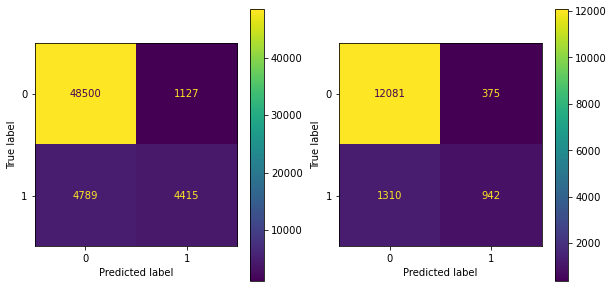

In [15]:
model = RandomForestClassifier(
    n_estimators = 64,                # 32, 64, 128
    min_samples_split = 64,           # 48, 64
    max_depth = 32,                   # 28, 32, 36, 40
    min_samples_leaf = 1,             # 1, 2
    random_state = 42,
    max_features = "sqrt"
)
model.fit(x_train, y_train)

print("Train - {:.4f} - Valid - {:.4f}".format(
    matthews_corrcoef(y_train, model.predict(x_train)),
    matthews_corrcoef(y_valid, model.predict(x_valid)))
)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
plot_confusion_matrix(model, x_train, y_train, ax = ax[0])
plot_confusion_matrix(model, x_valid, y_valid, ax = ax[1])

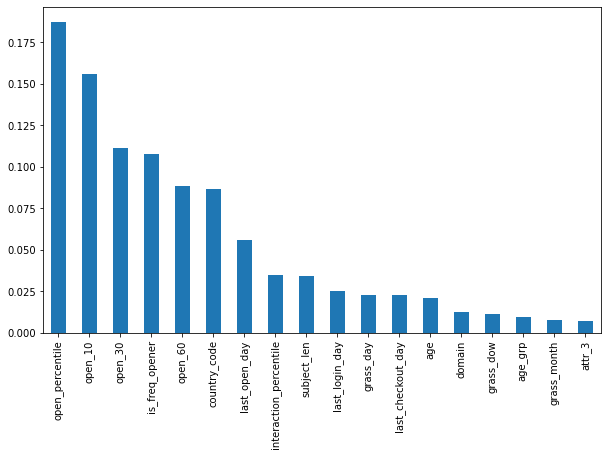

In [16]:
feat_importances = pd.Series(model.feature_importances_, index = train_df_clean.drop("open_flag", axis = 1).columns)
feat_importances.sort_values(ascending = False).plot(kind = 'bar', figsize = (10, 6))

# Prediction

In [17]:
# test_df_clean = preprocess(test_df, users_df_clean)
# test_df_clean

In [18]:
# pred = model.predict(test_df_clean.to_numpy())
# pred

In [19]:
# output_df = pd.DataFrame({
#     "row_id": test_df_clean.index,
#     "open_flag": pred
# })
# output_df

In [20]:
# print(train_df_clean["open_flag"].value_counts(normalize = True))
# print(output_df["open_flag"].value_counts(normalize = True))

In [21]:
# output_df.to_csv("./data/submission.csv", index = False)